In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

loan_data=pd.read_csv('/Users/neiloza/Downloads/lending-club-loan-data/loan.csv',low_memory=True)


/Users/neiloza/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
entries=len(loan_data.index)
percentile=.4
loan_data_cleaned=loan_data.dropna(thresh=int(percentile*entries),axis=1)
loan_data_cleaned=loan_data_cleaned[loan_data_cleaned.loan_status!='Fully Paid']
loan_data_cleaned


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N
5,5550,5550,5550.0,36 months,15.02,192.45,C,C3,Director COE,10+ years,...,60.0,0.0,0.0,831687.0,185378.0,65900.0,203159.0,N,Cash,N
6,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,...,NaN,0.0,0.0,854.0,854.0,0.0,0.0,N,Cash,N
7,6000,6000,6000.0,36 months,13.56,203.79,C,C1,Assistant Director,10+ years,...,85.7,0.0,0.0,117242.0,91535.0,33100.0,61742.0,N,DirectPay,N
8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Legal Assistant III,10+ years,...,60.0,0.0,0.0,57426.0,41882.0,21500.0,34626.0,N,Cash,N
9,6000,6000,6000.0,36 months,14.47,206.44,C,C2,NaN,< 1 year,...,26.3,0.0,0.0,477390.0,105911.0,98300.0,89600.0,N,Cash,N


In [3]:
columns_to_drop=['emp_title','title','pymnt_plan','zip_code','out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','issue_d','earliest_cr_line']

In [4]:
loan_data_cleaned=loan_data_cleaned.drop(columns_to_drop,axis=1)

In [17]:
sample=loan_data_cleaned.sample(n=10000)
y=sample.loan_status
y=y.apply(lambda x: 0 if x=='Current'or x=='In Grace Period' else 1)
dummied_loan_data=sample.drop(['loan_status'],axis=1)
dummied_loan_data=pd.get_dummies(dummied_loan_data,drop_first=True)
X_forest=dummied_loan_data.fillna(dummied_loan_data.median())

In [28]:
X_logistic=dummied_loan_data.fillna(dummied_loan_data.mean())

In [29]:
X_train_lr,X_test_lr,y_train_lr,y_test_lr=train_test_split(X_logistic,y,test_size=.25)



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X_forest,y,test_size=.25,random_state=42)
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8556

In [7]:
s1=pd.DataFrame(X_forest.columns.values)
s1.columns=['column_name']
s1.loc[:,'column_importance']=rf.feature_importances_
s1.head()

,column_name,column_importance
0,loan_amnt,0.011779
1,funded_amnt,0.011768
2,funded_amnt_inv,0.012119
3,int_rate,0.026208
4,installment,0.015321


In [8]:
params={'n_estimators':[100],'max_depth':[25,30,35],'max_features':[.30,.35,.40]}

In [9]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(rf,params,cv=5)
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_depth': [25, 30, 35], 'max_features': [0.3, 0.35, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
gcv.best_score_

0.8674666666666667

In [11]:
rf=RandomForestClassifier(max_features=.35,n_estimators=100,max_depth=30)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)


0.86

In [42]:
from sklearn.metrics import precision_recall_curve as prc,f1_score, recall_score, precision_score, roc_auc_score,roc_curve,accuracy_score
def evaluate_model(func_X_train, func_X_test, func_y_train, func_y_test, model):
    model.fit(func_X_train,func_y_train)
    prob_of_1=model.predict_proba(func_X_test)[:,1]
    precision, recall, threshold=prc(y_true=func_y_test,probas_pred=prob_of_1)
    plt.plot(precision,recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision Recall Curve')
    plt.show()
    print('the Precision is '+str(precision_score(y_true=func_y_test,y_pred=model.predict(func_X_test))))
    print('the Recall is '+str(recall_score(y_true=func_y_test,y_pred=model.predict(func_X_test))))
    print('the f1 score is '+str(f1_score(func_y_test,model.predict(func_X_test))))
    print('the roc-auc score is '+str(roc_auc_score(func_y_test,prob_of_1)))
    print('the accuracy score is '+str(accuracy_score(func_y_test,model.predict(func_X_test))))

    fpr, tpr, threshold2=roc_curve(func_y_test,prob_of_1)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(' ROC Curve')
    plt.show()








In [35]:
default_probabilities=rf.predict_proba(X_test)[:,1]


In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


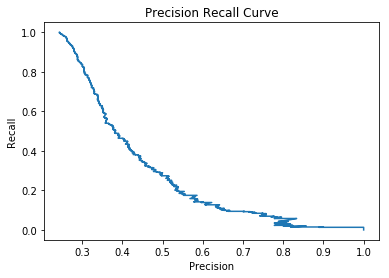

the Precision is 0.8125
the Recall is 0.02145214521452145
the f1 score is 0.04180064308681672
the roc-auc score is 0.6815591009998571
the roc-auc score is 0.7616


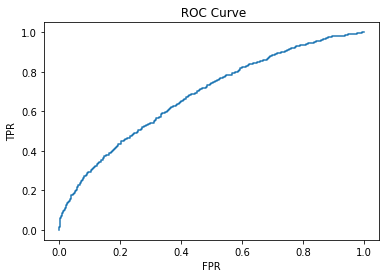

In [41]:
evaluate_model(X_train_lr,X_test_lr,y_train_lr,y_test_lr,lr)

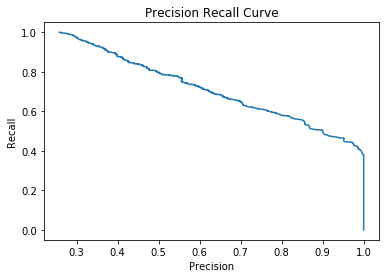

the Precision is 0.8560794044665012
the Recall is 0.5348837209302325
the f1 score is 0.6583969465648856
the roc-auc score is 0.8564683758540712


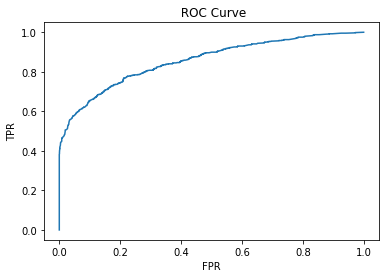

In [32]:
evaluate_model(X_train,X_test, y_train, y_test,rf)

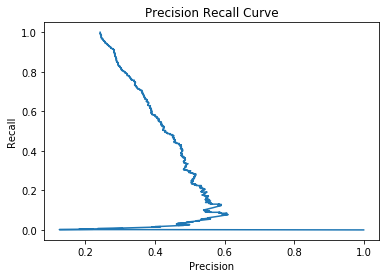

the Precision is 0.3219877467665078
the Recall is 0.7805280528052805
the f1 score is 0.45590361445783134
the roc-auc score is 0.6981112842012818


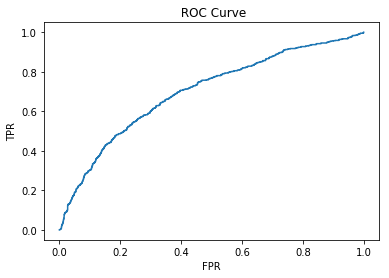

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
evaluate_model(X_train_lr,X_test_lr,y_train_lr,y_test_lr,gnb)